In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams["text.usetex"] = True

SAVE = True

base_dir = os.path.abspath("..")
results_dir = os.path.join(base_dir, "..", "results")
figures_dir = os.path.join(base_dir, "..", "figures")

gen_refs = pd.read_csv(os.path.join(results_dir, f"merged_gen_refs_vanilla_gpt-4_unique.csv"))
intro_refs = pd.read_csv(os.path.join(results_dir, f"merged_intro_refs_vanilla_gpt-4_unique.csv"))

# Only use references that correspond to existing generated
mask = gen_refs["Exists"] == 1.0
intro_refs = intro_refs[mask]
gen_refs = gen_refs[mask]

/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_5451/3435985662.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intro_year["Type"] = "Ground truth references"
/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_5451/3435985662.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  existing_year["Type"] = "Existing generated references"


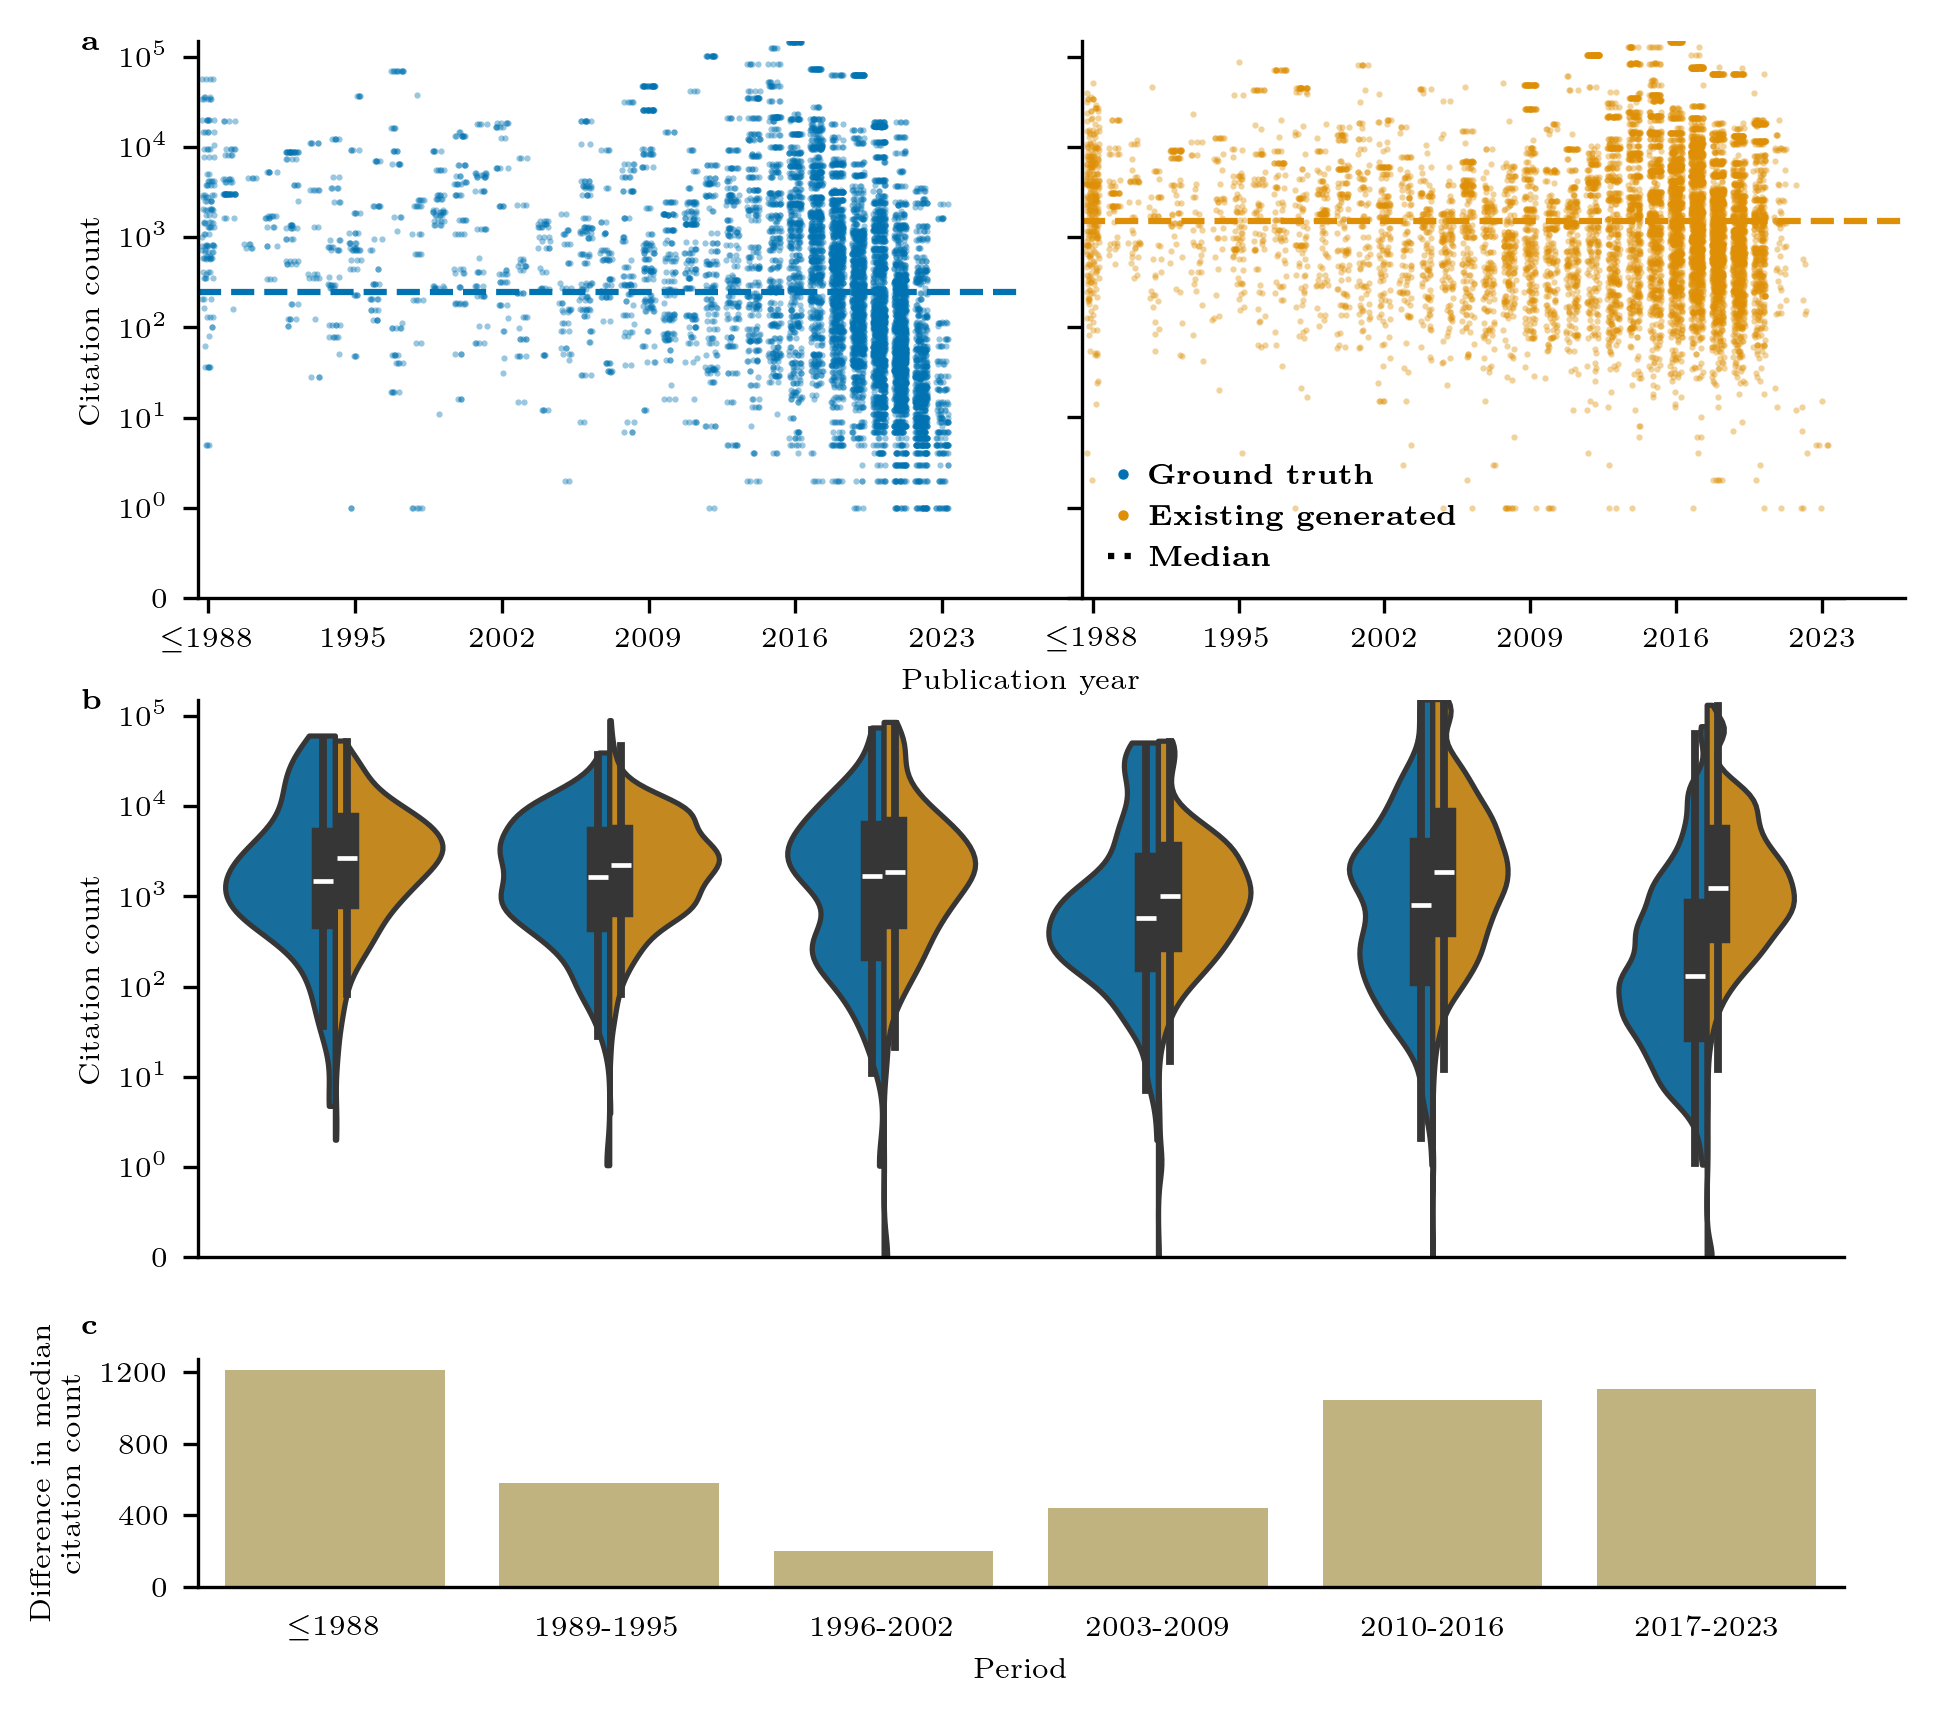

In [2]:
# Main Figure 3

# Publications and years
Figure1, ax1 = plt.subplot_mosaic(
    [["A"], ["A"], ["B"], ["B"], ["C"]],
    figsize=(7.08,6.69),
    dpi=300,
    gridspec_kw={'wspace': 0, 'hspace': 0.45}
)

starting_year = 1988

intro_year = intro_refs[["Publication Year", "Citation Count_sch"]]
intro_year["Type"] = "Ground truth references"
intro_year.loc[intro_year["Publication Year"] <= starting_year, "Publication Year"] = starting_year
existing_year = gen_refs[["Publication Year", "Citation Count_sch"]]
existing_year["Type"] = "Existing generated references"
existing_year.loc[existing_year["Publication Year"] <= starting_year, "Publication Year"] = starting_year

df_years = pd.concat([intro_year, existing_year], ignore_index=True)
df_years["Citation Count_sch"] += 0.1
df_years.dropna(subset=["Publication Year"], axis=0, inplace=True)

df_years.loc[df_years["Publication Year"] <= 1988, "Period"] = "<=1988"
df_years.loc[(df_years["Publication Year"] > 1988) & (df_years["Publication Year"] <= 1995), "Period"] = "1989-1995"
df_years.loc[(df_years["Publication Year"] > 1995) & (df_years["Publication Year"] <= 2002), "Period"] = "1996-2002"
df_years.loc[(df_years["Publication Year"] > 2002) & (df_years["Publication Year"] <= 2009), "Period"] = "2003-2009"
df_years.loc[(df_years["Publication Year"] > 2009) & (df_years["Publication Year"] <= 2016), "Period"] = "2010-2016"
df_years.loc[(df_years["Publication Year"] > 2016) & (df_years["Publication Year"] <= 2023), "Period"] = "2017-2023"

sns.stripplot(
    data=intro_year,
    x="Publication Year",
    y="Citation Count_sch",
    log_scale=True,
    color="#0173b2",
    jitter=0.3,
    alpha=0.4,
    size=1.5,
    ax=ax1["A"],
    zorder=0,
)

ax1["A"].axhline(y=intro_year["Citation Count_sch"].median(), color='#0173b2', linestyle='--',xmax=0.50)

ax1["A"].set_xlim(-0.5, 78)
ax1["A"].set_ylim(0.1, 150000)
ax1["A"].set_xlabel("Publication year", fontsize=7)
ax1["A"].set_ylabel("Citation count", fontsize=7)
ax1["A"].set_yticks(ticks=[0.1, 1, 10, 100, 1000, 10000, 100000], 
              labels=["0", r"$10^0$", r"$10^1$", r"$10^2$", r"$10^3$", r"$10^4$", r"$10^5$"], fontsize=7)
ax1["A"].set_xticks(ticks=[0,7,14,21,28,35],
                    labels=[r"$\leq$1988","1995","2002","2009","2016","2023"],
                    fontsize=7)
sns.despine(ax=ax1["A"])

second_ax = inset_axes(
    ax1["A"], width="50%", height="100%", loc='lower right',
    bbox_to_anchor=(0.05, -0.037, 1, 1), bbox_transform=ax1["A"].transAxes # (0.05, -0.03, 1, 1)
)

sns.stripplot(
    data=existing_year,
    x="Publication Year",
    y="Citation Count_sch",
    log_scale=True,
    color="#de8f05",
    jitter=0.3,
    alpha=0.4,
    size=1.5,
    ax=second_ax,
    zorder=0,
)

second_ax.axhline(y=existing_year["Citation Count_sch"].median(), color='#de8f05', linestyle='--')

second_ax.set_xlim(-0.5, 39)
second_ax.set_ylim(0.1, 150000)
second_ax.set_xlabel("")
second_ax.set_ylabel("")
second_ax.set_yticks(ticks=[0.1, 1, 10, 100, 1000, 10000, 100000], 
              labels=["", "", "", "", "", "", ""], fontsize=7)
second_ax.set_xticks(ticks=[0,7,14,21,28,35],
                    labels=[r"$\leq$1988","1995","2002","2009","2016","2023"],
                    fontsize=7)

sns.despine(ax=second_ax)

second_ax.legend(
    handles=[
        Line2D([0], [0], color='#0173b2', marker='o', linestyle='None',
               markersize=1.5, label=r'\textbf{Ground truth}'),
        Line2D([0], [0], color='#de8f05', marker='o', linestyle='None',
               markersize=1.5, label=r'\textbf{Existing generated}'),
        Line2D([0], [0], color='black', linestyle=':', label=r'\textbf{Median}'),
    ],
    loc="lower left",
    fontsize=7,
    frameon=False,
    ncol=1,
    columnspacing=0.5,
    handletextpad=0.4,
    handlelength=1.0,
    title="",
    title_fontsize=7,
)

# second plot
sns.violinplot(
    data=df_years,
    x="Period",
    y="Citation Count_sch",
    hue="Type",
    cut=0.1,
    log_scale=True,
    palette="colorblind",
    split=True,
    inner="box",
    legend=False,
    order=["<=1988", "1989-1995", "1996-2002", "2003-2009", "2010-2016", "2017-2023"],
    ax=ax1["B"],
)

ax1["B"].tick_params(bottom=False)

ax1["B"].set_ylim(0.1, 150000)
ax1["B"].set_xlabel("", fontsize=7)
ax1["B"].set_ylabel("Citation count", fontsize=7)
ax1["B"].set_yticks(ticks=[0.1, 1, 10, 100, 1000, 10000, 100000], 
              labels=["0", r"$10^0$", r"$10^1$", r"$10^2$", r"$10^3$", r"$10^4$", r"$10^5$"], fontsize=7)
ax1["B"].set_xticks(ticks=[], labels=[], fontsize=7)

sns.despine(ax=ax1["B"])

# third plot
period_medians = df_years.groupby(["Type", "Period"]).median()
periods = period_medians.query("Type == 'Existing generated references'").index.get_level_values("Period").to_list()
period_values = period_medians.query("Type == 'Existing generated references'")["Citation Count_sch"].values - period_medians.query("Type == 'Ground truth references'")["Citation Count_sch"].values
sns.barplot(
    x=periods,
    y=period_values,
    color="#ccb974",
    order=["<=1988", "1989-1995", "1996-2002", "2003-2009", "2010-2016", "2017-2023"],
    ax=ax1["C"],
)

ax1["C"].tick_params(bottom=False)

ax1["C"].set_xlabel("Period", fontsize=7)
ax1["C"].set_ylabel("Difference in median \n citation count", fontsize=7)
ax1["C"].set_yticks(ticks=[0, 400, 800, 1200], 
              labels=["0", "400", "800", "1200"], fontsize=7)
ax1["C"].set_xticks(ticks=[0,1,2,3,4,5],
                    labels=[r"$\leq$1988","1989-1995", "1996-2002", "2003-2009", "2010-2016", "2017-2023"],
                    fontsize=7)

sns.despine(ax=ax1["C"])

# annotations
annotations = {
    'A': r'\textbf{a}',
    'B': r'\textbf{b}',
    'C': r'\textbf{c}',
}

# Annotate each subplot
for key, ax in ax1.items():
    if key == "C":
        ax.text(-0.07, 1.2, annotations[key], transform=ax.transAxes, 
            fontsize=7, fontweight='bold', va='top', ha='left')
        continue
    ax.text(-0.07, 1.02, annotations[key], transform=ax.transAxes, 
            fontsize=7, fontweight='bold', va='top', ha='left')

if SAVE:
    plt.savefig(os.path.join(figures_dir, "Main_fig_3.pdf"), bbox_inches="tight")